# 🔧 Feature Engineering: Preparing Data for Machine Learning

Welcome to **Feature Engineering** - one of the most crucial steps in machine learning! 🚀

## 🎯 What is Feature Engineering?

Feature Engineering is like being a **data chef** 👨‍🍳 - you take raw ingredients (original data) and transform them into a delicious meal (model-ready features) that machine learning algorithms can easily digest and learn from.

### 🌟 Why is this so important?
- **🎯 Better Predictions**: Well-engineered features = better model performance
- **🧠 Algorithm Friendly**: Makes data easier for algorithms to understand
- **📊 Information Extraction**: Reveals hidden patterns in the data
- **⚡ Efficiency**: Reduces training time and improves accuracy

## 📚 What We'll Learn Today:

### 🔄 **Data Preprocessing** 
- Handle missing values (fill the gaps)
- Deal with outliers (unusual values)
- Remove duplicates and clean data

### 🏷️ **Categorical Encoding**
- Convert text labels to numbers
- One-Hot Encoding, Label Encoding, Target Encoding
- Handle high-cardinality categories

### 📏 **Feature Scaling** 
- Standardization vs. Normalization
- When and why to scale features
- Different scaling techniques

### ✨ **Feature Creation**
- Create new features from existing ones
- Polynomial features, interactions
- Domain-specific transformations

### 🎯 **Feature Selection**
- Remove irrelevant or redundant features
- Statistical tests and importance scores
- Dimensionality reduction

### ⚖️ **Class Imbalance Handling**
- SMOTE (Synthetic Minority Oversampling)
- Undersampling and Oversampling
- Class weights

---

## 🚀 Let's Transform Our Data!

By the end of this notebook, you'll have:
- ✅ Clean, preprocessed data
- ✅ Properly encoded categorical variables  
- ✅ Scaled numerical features
- ✅ New engineered features
- ✅ Balanced target classes
- ✅ A dataset ready for machine learning!

Let's dive in! 🏊‍♂️

In [1]:
# 📦 Step 1: Import All Required Libraries
print("📦 IMPORTING LIBRARIES FOR FEATURE ENGINEERING...")
print("="*50)

# Core data manipulation and analysis
import pandas as pd              # Data manipulation and analysis
import numpy as np               # Numerical computing
import matplotlib.pyplot as plt  # Data visualization
import seaborn as sns            # Statistical data visualization
import warnings                  # Handle warning messages
warnings.filterwarnings('ignore')

# Set up nice-looking plots
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 10

# Machine Learning Libraries
from sklearn.model_selection import train_test_split     # Split data into train/test
from sklearn.preprocessing import StandardScaler         # Scale features to standard distribution
from sklearn.preprocessing import MinMaxScaler          # Scale features to 0-1 range
from sklearn.preprocessing import LabelEncoder          # Convert categories to numbers
from sklearn.preprocessing import OneHotEncoder         # Create binary columns for categories
from sklearn.feature_selection import SelectKBest       # Select best features
from sklearn.feature_selection import chi2, f_classif   # Statistical tests for feature selection

# Handle class imbalance
from imblearn.over_sampling import SMOTE                # Synthetic Minority Oversampling
from collections import Counter                         # Count class frequencies

# File path handling
from pathlib import Path
import sys

# 📁 Step 2: Set up paths to our project
print("\n📁 SETTING UP PROJECT PATHS...")
print("="*35)

# Get the current notebook directory and find project root
current_dir = Path.cwd()
project_root = current_dir.parent

# Add src directory to Python path so we can import our modules
src_path = project_root / 'src'
sys.path.append(str(src_path))

print(f"📂 Project root: {project_root}")
print(f"📂 Source code: {src_path}")
print(f"📂 Current notebook: {current_dir}")

# 🎯 Step 3: Define what we're trying to predict
print("\n🎯 SETTING UP TARGET VARIABLE...")
print("="*35)

# This will be updated once we load and examine the data
TARGET_COLUMN = None  # We'll identify this from the data
RANDOM_STATE = 42     # For reproducible results

print(f"🎲 Random state set to: {RANDOM_STATE} (for reproducible results)")
print("✅ Setup complete! Ready to load and engineer features.")

# 📊 Step 4: Prepare for data loading
print("\n📊 PREPARING FOR DATA LOADING...")
print("="*35)
print("Next, we'll load our cleaned data from the previous EDA analysis.")
print("We'll use the insights from EDA to guide our feature engineering decisions.")

📦 IMPORTING LIBRARIES FOR FEATURE ENGINEERING...

📁 SETTING UP PROJECT PATHS...
📂 Project root: c:\Users\DELL\Desktop\AI-Project\AI-Project
📂 Source code: c:\Users\DELL\Desktop\AI-Project\AI-Project\src
📂 Current notebook: c:\Users\DELL\Desktop\AI-Project\AI-Project\notebooks

🎯 SETTING UP TARGET VARIABLE...
🎲 Random state set to: 42 (for reproducible results)
✅ Setup complete! Ready to load and engineer features.

📊 PREPARING FOR DATA LOADING...
Next, we'll load our cleaned data from the previous EDA analysis.
We'll use the insights from EDA to guide our feature engineering decisions.


## 📁 Step 1: Load and Examine Our Data

Let's start by loading our dataset and taking a quick look at what we're working with. We'll use the insights from our previous EDA to guide our feature engineering decisions.

### 🔍 What we'll check:
- **📊 Data shape and types**: Understand our starting point
- **🎯 Target variable**: Identify what we're predicting  
- **📋 Feature types**: Separate numerical and categorical features
- **❓ Data quality**: Check for issues that need fixing

In [2]:
# 📁 Step 1: Load our dataset
print("📁 LOADING DATASET...")
print("="*25)

# Try to load from the data directory
data_path = project_root / 'data' / 'raw'
possible_files = ['employee_data.csv', 'employees.csv', 'hr_data.csv', 'data.csv']

df = None
loaded_file = None

# Look for common employee dataset filenames
for filename in possible_files:
    file_path = data_path / filename
    if file_path.exists():
        print(f"📂 Found data file: {filename}")
        df = pd.read_csv(file_path)
        loaded_file = filename
        break

# If not found in data/raw, try other locations
if df is None:
    # Try data directory root
    for filename in possible_files:
        file_path = project_root / 'data' / filename
        if file_path.exists():
            print(f"📂 Found data file: {filename}")
            df = pd.read_csv(file_path)
            loaded_file = filename
            break

# If still not found, try project root
if df is None:
    for filename in possible_files:
        file_path = project_root / filename
        if file_path.exists():
            print(f"📂 Found data file: {filename}")
            df = pd.read_csv(file_path)
            loaded_file = filename
            break

# Check if we successfully loaded data
if df is not None:
    print(f"✅ Successfully loaded: {loaded_file}")
    print(f"📊 Dataset shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
else:
    print("❌ No dataset found. Please ensure you have a CSV file in the data directory.")
    print("📝 Expected files: employee_data.csv, employees.csv, hr_data.csv, or data.csv")

# 🔍 Step 2: Quick data examination
if df is not None:
    print(f"\n🔍 QUICK DATA EXAMINATION:")
    print("="*30)
    
    print(f"📋 Column names:")
    for i, col in enumerate(df.columns, 1):
        print(f"  {i:2}. {col}")
    
    print(f"\n📊 Data types:")
    for col, dtype in df.dtypes.items():
        print(f"  • {col:20} → {dtype}")
    
    print(f"\n❓ Missing values:")
    missing = df.isnull().sum()
    if missing.sum() == 0:
        print("  ✅ No missing values found!")
    else:
        for col, count in missing[missing > 0].items():
            print(f"  • {col:20} → {count:,} missing")
    
    print(f"\n🔢 Basic statistics:")
    print(f"  • Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    print(f"  • Duplicate rows: {df.duplicated().sum():,}")

📁 LOADING DATASET...
📂 Found data file: employee_data.csv
✅ Successfully loaded: employee_data.csv
📊 Dataset shape: 11,582 rows × 10 columns

🔍 QUICK DATA EXAMINATION:
📋 Column names:
   1. satisfaction_level
   2. last_evaluation
   3. number_project
   4. average_montly_hours
   5. time_spend_company
   6. Work_accident
   7. quit
   8. promotion_last_5years
   9. department
  10. salary

📊 Data types:
  • satisfaction_level   → float64
  • last_evaluation      → float64
  • number_project       → int64
  • average_montly_hours → int64
  • time_spend_company   → int64
  • Work_accident        → int64
  • quit                 → int64
  • promotion_last_5years → float64
  • department           → object
  • salary               → object

❓ Missing values:
  • promotion_last_5years → 1 missing
  • department           → 1 missing
  • salary               → 1 missing

🔢 Basic statistics:
  • Memory usage: 2.09 MB
  • Duplicate rows: 9


In [3]:
# 🎯 Step 3: Identify target variable and feature types
if df is not None:
    print("\n🎯 IDENTIFYING TARGET VARIABLE...")
    print("="*35)
    
    # Common target variable names for employee attrition
    target_candidates = ['Attrition', 'attrition', 'Left', 'left', 'Turnover', 'turnover', 
                        'Quit', 'quit', 'Exit', 'exit', 'Churn', 'churn']
    
    # Look for target variable
    target_col = None
    for col in df.columns:
        if col in target_candidates or any(candidate.lower() in col.lower() for candidate in target_candidates):
            target_col = col
            break
    
    # If not found by name, look for binary variables (likely targets)
    if target_col is None:
        binary_cols = [col for col in df.columns if df[col].nunique() == 2]
        if binary_cols:
            print("🔍 Binary columns found (potential targets):")
            for i, col in enumerate(binary_cols, 1):
                values = df[col].unique()
                print(f"  {i}. {col}: {values}")
            
            # Assume first binary column is target for now
            target_col = binary_cols[0]
            print(f"\n🎯 Assuming target variable: '{target_col}'")
    
    if target_col:
        TARGET_COLUMN = target_col
        print(f"✅ Target variable identified: '{TARGET_COLUMN}'")
        
        # Show target distribution
        target_counts = df[TARGET_COLUMN].value_counts()
        print(f"\n📊 Target distribution:")
        for value, count in target_counts.items():
            percentage = (count / len(df)) * 100
            print(f"  • {value}: {count:,} ({percentage:.1f}%)")
    else:
        print("❓ Target variable not found automatically.")
        print("💡 You may need to specify it manually later.")
    
    # 📋 Step 4: Separate feature types
    print(f"\n📋 SEPARATING FEATURE TYPES...")
    print("="*30)
    
    # Get all columns except target
    feature_columns = [col for col in df.columns if col != TARGET_COLUMN]
    
    # Identify numerical features (numbers we can do math with)
    numerical_features = df[feature_columns].select_dtypes(include=[np.number]).columns.tolist()
    
    # Identify categorical features (text or categories)
    categorical_features = df[feature_columns].select_dtypes(include=['object']).columns.tolist()
    
    # Also check for numerical columns that should be treated as categorical
    # (like ID numbers, codes with few unique values)
    potential_categorical = []
    for col in numerical_features:
        unique_count = df[col].nunique()
        # If less than 10 unique values and they're integers, might be categorical
        if unique_count < 10 and df[col].dtype in ['int64', 'int32']:
            potential_categorical.append(col)
    
    print(f"🔢 Numerical features ({len(numerical_features)}):")
    for i, col in enumerate(numerical_features, 1):
        unique_count = df[col].nunique()
        print(f"  {i:2}. {col:20} → {unique_count:,} unique values")
    
    print(f"\n🏷️ Categorical features ({len(categorical_features)}):")
    for i, col in enumerate(categorical_features, 1):
        unique_count = df[col].nunique()
        print(f"  {i:2}. {col:20} → {unique_count:,} unique categories")
    
    if potential_categorical:
        print(f"\n🤔 Potential categorical (currently numerical):")
        for col in potential_categorical:
            values = df[col].unique()[:5]  # Show first 5 values
            print(f"  • {col:20} → {values}...")
            print(f"    💭 Consider: Should this be treated as categorical?")
    
    print(f"\n📊 Summary:")
    print(f"  • Total features: {len(feature_columns)}")
    print(f"  • Numerical: {len(numerical_features)}")
    print(f"  • Categorical: {len(categorical_features)}")
    if TARGET_COLUMN:
        print(f"  • Target: {TARGET_COLUMN}")
else:
    print("⚠️ Cannot proceed without data. Please load dataset first.")


🎯 IDENTIFYING TARGET VARIABLE...
✅ Target variable identified: 'quit'

📊 Target distribution:
  • 0: 9,582 (82.7%)
  • 1: 2,000 (17.3%)

📋 SEPARATING FEATURE TYPES...
🔢 Numerical features (7):
   1. satisfaction_level   → 92 unique values
   2. last_evaluation      → 65 unique values
   3. number_project       → 6 unique values
   4. average_montly_hours → 215 unique values
   5. time_spend_company   → 8 unique values
   6. Work_accident        → 2 unique values
   7. promotion_last_5years → 2 unique values

🏷️ Categorical features (2):
   1. department           → 10 unique categories
   2. salary               → 3 unique categories

🤔 Potential categorical (currently numerical):
  • number_project       → [2 5 7 6 4]...
    💭 Consider: Should this be treated as categorical?
  • time_spend_company   → [3 6 4 5 2]...
    💭 Consider: Should this be treated as categorical?
  • Work_accident        → [0 1]...
    💭 Consider: Should this be treated as categorical?

📊 Summary:
  • Total fe

## 🔄 Step 2: Data Preprocessing - Cleaning Our Data

Before we can engineer features, we need to clean our data! Think of this as **washing the vegetables** 🥬 before cooking - it's essential for a good final result.

### 🧹 What we'll clean:
- **❌ Missing values**: Fill gaps in our data
- **🔄 Duplicates**: Remove identical rows
- **📊 Outliers**: Handle extreme values that might confuse our model
- **🔧 Data types**: Make sure everything is in the right format

### 🎯 Why this matters:
- **Clean data = Better models** 📈
- **Prevents errors** during training ❌
- **Improves accuracy** and reliability ✅
- **Makes feature engineering** more effective 🔧

In [4]:
# 🔍 Step 1: Handle Missing Values
if df is not None:
    print("🔍 HANDLING MISSING VALUES...")
    print("="*30)
    
    # Check for missing values
    missing_values = df.isnull().sum()
    missing_percentage = (missing_values / len(df)) * 100
    
    print("📊 Missing values analysis:")
    has_missing = False
    for col in df.columns:
        missing_count = missing_values[col]
        missing_pct = missing_percentage[col]
        
        if missing_count > 0:
            has_missing = True
            print(f"  • {col:20} → {missing_count:,} missing ({missing_pct:.2f}%)")
    
    if not has_missing:
        print("  ✅ No missing values found! Data is complete.")
    else:
        print(f"\n🔧 FIXING MISSING VALUES...")
        print("="*25)
        
        # Strategy for handling missing values:
        # 1. Numerical: Fill with median (robust to outliers)
        # 2. Categorical: Fill with mode (most common value) or 'Unknown'
        
        for col in df.columns:
            if missing_values[col] > 0:
                missing_count = missing_values[col]
                missing_pct = missing_percentage[col]
                
                print(f"\n🔧 Fixing {col} ({missing_count:,} missing, {missing_pct:.1f}%):")
                
                if col in numerical_features:
                    # For numerical: use median (more robust than mean)
                    median_value = df[col].median()
                    df[col].fillna(median_value, inplace=True)
                    print(f"  ✅ Filled with median value: {median_value}")
                    
                elif col in categorical_features:
                    # For categorical: use mode (most common) or 'Unknown'
                    if df[col].mode().empty:
                        fill_value = 'Unknown'
                    else:
                        fill_value = df[col].mode()[0]
                    
                    df[col].fillna(fill_value, inplace=True)
                    print(f"  ✅ Filled with most common value: '{fill_value}'")
        
        # Verify all missing values are fixed
        remaining_missing = df.isnull().sum().sum()
        if remaining_missing == 0:
            print(f"\n✅ All missing values fixed successfully!")
        else:
            print(f"\n⚠️ {remaining_missing} missing values remain")
    
    # 🔄 Step 2: Handle Duplicate Rows
    print(f"\n🔄 HANDLING DUPLICATE ROWS...")
    print("="*27)
    
    # Check for duplicates
    duplicate_count = df.duplicated().sum()
    print(f"📊 Found {duplicate_count:,} duplicate rows")
    
    if duplicate_count > 0:
        print(f"🔧 Removing duplicates...")
        
        # Keep first occurrence, remove duplicates
        original_size = len(df)
        df = df.drop_duplicates(keep='first')
        new_size = len(df)
        removed = original_size - new_size
        
        print(f"  ✅ Removed {removed:,} duplicate rows")
        print(f"  📊 Dataset size: {original_size:,} → {new_size:,} rows")
    else:
        print("  ✅ No duplicate rows found!")
    
    print(f"\n📊 CLEANED DATASET SUMMARY:")
    print("="*30)
    print(f"  • Final shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
    print(f"  • Missing values: {df.isnull().sum().sum()}")
    print(f"  • Duplicate rows: {df.duplicated().sum()}")
    print(f"  • Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

else:
    print("⚠️ No data available for preprocessing.")

🔍 HANDLING MISSING VALUES...
📊 Missing values analysis:
  • promotion_last_5years → 1 missing (0.01%)
  • department           → 1 missing (0.01%)
  • salary               → 1 missing (0.01%)

🔧 FIXING MISSING VALUES...

🔧 Fixing promotion_last_5years (1 missing, 0.0%):
  ✅ Filled with median value: 0.0

🔧 Fixing department (1 missing, 0.0%):
  ✅ Filled with most common value: 'sales'

🔧 Fixing salary (1 missing, 0.0%):
  ✅ Filled with most common value: 'low'

✅ All missing values fixed successfully!

🔄 HANDLING DUPLICATE ROWS...
📊 Found 9 duplicate rows
🔧 Removing duplicates...
  ✅ Removed 9 duplicate rows
  📊 Dataset size: 11,582 → 11,573 rows

📊 CLEANED DATASET SUMMARY:
  • Final shape: 11,573 rows × 10 columns
  • Missing values: 0
  • Duplicate rows: 0
  • Memory usage: 2.17 MB


In [5]:
# 📊 Step 3: Handle Outliers (Extreme Values)
if df is not None and len(numerical_features) > 0:
    print("📊 HANDLING OUTLIERS...")
    print("="*20)
    
    print("🔍 What are outliers?")
    print("Outliers are data points that are significantly different from others.")
    print("Example: If most employees earn $30k-80k, someone earning $500k is an outlier.")
    print()
    
    # We'll use the IQR (Interquartile Range) method to detect outliers
    print("📐 Using IQR (Interquartile Range) method:")
    print("• Q1 = 25th percentile (25% of data below this)")
    print("• Q3 = 75th percentile (75% of data below this)")
    print("• IQR = Q3 - Q1 (middle 50% range)")
    print("• Outliers: values below Q1-1.5×IQR or above Q3+1.5×IQR")
    print()
    
    outlier_info = {}
    
    for col in numerical_features:
        print(f"🔍 Analyzing {col}:")
        
        # Calculate IQR boundaries
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define outlier boundaries
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Find outliers
        outliers_mask = (df[col] < lower_bound) | (df[col] > upper_bound)
        outliers_count = outliers_mask.sum()
        outliers_percentage = (outliers_count / len(df)) * 100
        
        print(f"  • Normal range: {lower_bound:.2f} to {upper_bound:.2f}")
        print(f"  • Outliers found: {outliers_count:,} ({outliers_percentage:.2f}%)")
        
        if outliers_count > 0:
            outlier_values = df[outliers_mask][col]
            print(f"  • Outlier range: {outlier_values.min():.2f} to {outlier_values.max():.2f}")
            
            # Store outlier info for decision making
            outlier_info[col] = {
                'count': outliers_count,
                'percentage': outliers_percentage,
                'lower_bound': lower_bound,
                'upper_bound': upper_bound,
                'mask': outliers_mask
            }
        else:
            print(f"  ✅ No outliers detected")
        print()
    
    # 🔧 Decide how to handle outliers
    print("🔧 OUTLIER HANDLING STRATEGY:")
    print("="*30)
    
    outliers_handled = 0
    
    for col, info in outlier_info.items():
        outlier_percentage = info['percentage']
        
        print(f"📊 {col}: {info['count']:,} outliers ({outlier_percentage:.1f}%)")
        
        if outlier_percentage > 10:
            # Too many outliers - might be legitimate data variation
            print(f"  🤔 High outlier percentage - keeping all values")
            print(f"  💡 These might represent legitimate data variation")
            
        elif outlier_percentage > 5:
            # Moderate outliers - cap them (winsorization)
            print(f"  🔧 Capping outliers to boundary values (winsorization)")
            
            # Cap outliers to the boundary values
            df.loc[df[col] < info['lower_bound'], col] = info['lower_bound']
            df.loc[df[col] > info['upper_bound'], col] = info['upper_bound']
            
            outliers_handled += info['count']
            print(f"  ✅ Capped {info['count']:,} outliers")
            
        elif outlier_percentage > 0:
            # Few outliers - remove them
            print(f"  🗑️ Removing outlier rows (small percentage)")
            
            # Remove rows with outliers in this column
            original_size = len(df)
            df = df[~info['mask']]
            new_size = len(df)
            removed = original_size - new_size
            
            outliers_handled += removed
            print(f"  ✅ Removed {removed:,} rows with outliers")
        
        print()
    
    if outliers_handled > 0:
        print(f"📊 OUTLIER HANDLING SUMMARY:")
        print(f"  • Total outliers handled: {outliers_handled:,}")
        print(f"  • Final dataset size: {len(df):,} rows")
    else:
        print("✅ No outlier handling needed - data looks good!")

else:
    if df is None:
        print("⚠️ No data available for outlier analysis.")
    else:
        print("ℹ️ No numerical features found - skipping outlier analysis.")

📊 HANDLING OUTLIERS...
🔍 What are outliers?
Outliers are data points that are significantly different from others.
Example: If most employees earn $30k-80k, someone earning $500k is an outlier.

📐 Using IQR (Interquartile Range) method:
• Q1 = 25th percentile (25% of data below this)
• Q3 = 75th percentile (75% of data below this)
• IQR = Q3 - Q1 (middle 50% range)
• Outliers: values below Q1-1.5×IQR or above Q3+1.5×IQR

🔍 Analyzing satisfaction_level:
  • Normal range: -0.03 to 1.33
  • Outliers found: 0 (0.00%)
  ✅ No outliers detected

🔍 Analyzing last_evaluation:
  • Normal range: 0.12 to 1.32
  • Outliers found: 0 (0.00%)
  ✅ No outliers detected

🔍 Analyzing number_project:
  • Normal range: 0.00 to 8.00
  • Outliers found: 0 (0.00%)
  ✅ No outliers detected

🔍 Analyzing average_montly_hours:
  • Normal range: 28.00 to 372.00
  • Outliers found: 0 (0.00%)
  ✅ No outliers detected

🔍 Analyzing time_spend_company:
  • Normal range: 1.50 to 5.50
  • Outliers found: 663 (5.73%)
  • O

## 🏷️ Step 3: Categorical Encoding - Converting Text to Numbers

Machine learning algorithms can only work with numbers, not text! 🔢 So we need to convert our categorical features (like "Sales", "Engineering", "HR") into numbers that algorithms can understand.

### 🔄 Encoding Methods We'll Use:

#### 1️⃣ **Label Encoding** 
- **What**: Assigns each category a number (0, 1, 2, ...)
- **When**: For ordinal data (categories with natural order)
- **Example**: Education → High School=0, Bachelor's=1, Master's=2, PhD=3

#### 2️⃣ **One-Hot Encoding**
- **What**: Creates binary columns (0 or 1) for each category
- **When**: For nominal data (no natural order)
- **Example**: Department → Dept_Sales=1, Dept_HR=0, Dept_IT=0

#### 3️⃣ **Target Encoding** 
- **What**: Replaces categories with target variable statistics
- **When**: High-cardinality features (many categories)
- **Example**: Job_Role → average attrition rate for each role

### 🎯 Why This Matters:
- **🤖 Algorithm Compatibility**: Makes data readable by ML models
- **📊 Pattern Recognition**: Helps models find relationships
- **⚡ Performance**: Proper encoding improves model accuracy

In [6]:
# 🏷️ Step 1: Analyze categorical features for encoding strategy
if df is not None and len(categorical_features) > 0:
    print("🏷️ ANALYZING CATEGORICAL FEATURES...")
    print("="*38)
    
    encoding_strategy = {}
    
    for col in categorical_features:
        unique_count = df[col].nunique()
        values = df[col].unique()
        
        print(f"📊 {col}:")
        print(f"  • Unique categories: {unique_count}")
        print(f"  • Categories: {values[:5]}{'...' if len(values) > 5 else ''}")
        
        # Decide encoding strategy based on characteristics
        if unique_count == 2:
            # Binary categorical - use label encoding
            strategy = "Label Encoding (Binary)"
            encoding_strategy[col] = "label"
            
        elif unique_count <= 5:
            # Few categories - use one-hot encoding
            strategy = "One-Hot Encoding (Few categories)"
            encoding_strategy[col] = "onehot"
            
        elif unique_count <= 20:
            # Moderate categories - check if ordinal or use one-hot
            # Check if there's natural ordering (common ordinal patterns)
            ordinal_patterns = ['low', 'medium', 'high', 'small', 'large', 
                              'junior', 'senior', 'beginner', 'intermediate', 'advanced']
            
            is_ordinal = any(pattern in str(values).lower() for pattern in ordinal_patterns)
            
            if is_ordinal:
                strategy = "Label Encoding (Ordinal detected)"
                encoding_strategy[col] = "label"
            else:
                strategy = "One-Hot Encoding (Nominal)"
                encoding_strategy[col] = "onehot"
                
        else:
            # Many categories - use target encoding
            strategy = "Target Encoding (High cardinality)"
            encoding_strategy[col] = "target"
        
        print(f"  🎯 Strategy: {strategy}")
        print()
    
    # 🔧 Step 2: Apply encoding strategies
    print("🔧 APPLYING ENCODING STRATEGIES...")
    print("="*35)
    
    # Store original columns for reference
    original_columns = df.columns.tolist()
    encoded_features = []
    
    # Keep track of encoders for future use
    label_encoders = {}
    onehot_encoders = {}
    
    for col, strategy in encoding_strategy.items():
        print(f"🔧 Encoding {col} using {strategy.upper()}...")
        
        if strategy == "label":
            # Label Encoding: Assign numbers to categories
            le = LabelEncoder()
            df[f'{col}_encoded'] = le.fit_transform(df[col])
            label_encoders[col] = le
            
            # Show mapping
            mapping = dict(zip(le.classes_, le.transform(le.classes_)))
            print(f"  📋 Mapping: {mapping}")
            encoded_features.append(f'{col}_encoded')
            
        elif strategy == "onehot":
            # One-Hot Encoding: Create binary columns
            encoded_cols = pd.get_dummies(df[col], prefix=col, prefix_sep='_')
            
            # Add to dataframe
            df = pd.concat([df, encoded_cols], axis=1)
            
            print(f"  📋 Created {len(encoded_cols.columns)} binary columns:")
            for new_col in encoded_cols.columns:
                print(f"    • {new_col}")
                encoded_features.append(new_col)
                
        elif strategy == "target" and TARGET_COLUMN:
            # Target Encoding: Replace with target statistics
            target_mean = df.groupby(col)[TARGET_COLUMN].transform('mean')
            df[f'{col}_target_encoded'] = target_mean
            
            # Show some mappings
            category_means = df.groupby(col)[TARGET_COLUMN].mean().sort_values(ascending=False)
            print(f"  📋 Target means (top 5):")
            for cat, mean_val in category_means.head().items():
                print(f"    • {cat}: {mean_val:.3f}")
            encoded_features.append(f'{col}_target_encoded')
        
        print(f"  ✅ Encoded successfully!")
        print()
    
    # 🗑️ Step 3: Remove original categorical columns
    print("🗑️ CLEANING UP ORIGINAL CATEGORICAL COLUMNS...")
    print("="*45)
    
    columns_to_drop = categorical_features.copy()
    
    print(f"📋 Removing original categorical columns:")
    for col in columns_to_drop:
        print(f"  • {col}")
    
    df = df.drop(columns=columns_to_drop)
    
    print(f"\n📊 ENCODING SUMMARY:")
    print("="*20)
    print(f"  • Original categorical columns: {len(categorical_features)}")
    print(f"  • New encoded features: {len(encoded_features)}")
    print(f"  • Total columns now: {len(df.columns)}")
    
    # Update feature lists
    categorical_features = []  # No more categorical features
    numerical_features = [col for col in df.columns 
                         if col != TARGET_COLUMN and col not in encoded_features]
    all_features = numerical_features + encoded_features
    
    print(f"  • Numerical features: {len(numerical_features)}")
    print(f"  • Encoded features: {len(encoded_features)}")
    print(f"  • Total features: {len(all_features)}")

else:
    if df is None:
        print("⚠️ No data available for encoding.")
    else:
        print("ℹ️ No categorical features found - skipping encoding step.")

🏷️ ANALYZING CATEGORICAL FEATURES...
📊 department:
  • Unique categories: 10
  • Categories: ['sales' 'accounting' 'hr' 'technical' 'support']...
  🎯 Strategy: One-Hot Encoding (Nominal)

📊 salary:
  • Unique categories: 3
  • Categories: ['low' 'medium' 'high']
  🎯 Strategy: One-Hot Encoding (Few categories)

🔧 APPLYING ENCODING STRATEGIES...
🔧 Encoding department using ONEHOT...
  📋 Created 10 binary columns:
    • department_IT
    • department_RandD
    • department_accounting
    • department_hr
    • department_management
    • department_marketing
    • department_product_mng
    • department_sales
    • department_support
    • department_technical
  ✅ Encoded successfully!

🔧 Encoding salary using ONEHOT...
  📋 Created 3 binary columns:
    • salary_high
    • salary_low
    • salary_medium
  ✅ Encoded successfully!

🗑️ CLEANING UP ORIGINAL CATEGORICAL COLUMNS...
📋 Removing original categorical columns:
  • department
  • salary

📊 ENCODING SUMMARY:
  • Original categorical co

## 📏 Step 4: Feature Scaling - Making Features Comparable

Imagine comparing apples and elephants! 🍎🐘 If one feature ranges from 0-1 (like percentages) and another from 1000-100000 (like salaries), the larger numbers will dominate the smaller ones in machine learning algorithms.

### 🎯 Why Scale Features?

#### 🔍 **The Problem**:
- **Age**: 20-65 years
- **Salary**: $30,000-$150,000  
- **Experience**: 0-40 years

The salary values are much larger, so algorithms might think salary is more important just because of the scale!

#### ✅ **The Solution**: Scale all features to similar ranges

### 📊 Scaling Methods:

#### 1️⃣ **StandardScaler (Z-score normalization)**
- **Formula**: (value - mean) / standard_deviation
- **Result**: Mean=0, Standard deviation=1
- **Best for**: Normal distributions, most ML algorithms

#### 2️⃣ **MinMaxScaler (Min-Max normalization)** 
- **Formula**: (value - min) / (max - min)
- **Result**: All values between 0 and 1
- **Best for**: When you want specific bounds, neural networks

### 🤖 Which Algorithms Need Scaling?
- **Need scaling**: SVM, Neural Networks, KNN, PCA, Clustering
- **Don't need scaling**: Tree-based (Random Forest, XGBoost, Decision Trees)

In [7]:
# 📏 Step 1: Analyze features before scaling
if df is not None and len(numerical_features) > 0:
    print("📏 ANALYZING FEATURES FOR SCALING...")
    print("="*35)
    
    print("📊 Current feature ranges (before scaling):")
    for col in numerical_features:
        min_val = df[col].min()
        max_val = df[col].max()
        mean_val = df[col].mean()
        std_val = df[col].std()
        
        print(f"  • {col:20} → Range: {min_val:8.2f} to {max_val:10.2f}")
        print(f"    {'':20}   Mean: {mean_val:8.2f}, Std: {std_val:8.2f}")
    
    # Check if scaling is needed
    ranges = [(df[col].max() - df[col].min()) for col in numerical_features]
    max_range = max(ranges)
    min_range = min(ranges)
    range_ratio = max_range / min_range if min_range > 0 else float('inf')
    
    print(f"\n🔍 Scale Analysis:")
    print(f"  • Largest range: {max_range:,.2f}")
    print(f"  • Smallest range: {min_range:,.2f}")
    print(f"  • Range ratio: {range_ratio:,.1f}:1")
    
    if range_ratio > 10:
        scaling_needed = True
        print(f"  🚨 Large scale differences detected - scaling recommended!")
    else:
        scaling_needed = False
        print(f"  ✅ Scales are relatively similar - scaling optional")
    
    # 🔧 Step 2: Apply scaling
    print(f"\n🔧 APPLYING FEATURE SCALING...")
    print("="*28)
    
    if scaling_needed or True:  # We'll scale anyway for demonstration
        
        # We'll use StandardScaler as it's most common and robust
        print("📊 Using StandardScaler (z-score normalization):")
        print("  • Transforms to: mean=0, std=1")
        print("  • Formula: (value - mean) / standard_deviation")
        print("  • Good for: Most ML algorithms, normal distributions")
        print()
        
        # Initialize the scaler
        scaler = StandardScaler()
        
        # Fit and transform numerical features
        scaled_features = scaler.fit_transform(df[numerical_features])
        
        # Create new column names for scaled features
        scaled_column_names = [f"{col}_scaled" for col in numerical_features]
        
        # Create DataFrame with scaled features
        scaled_df = pd.DataFrame(scaled_features, 
                                columns=scaled_column_names,
                                index=df.index)
        
        # Add scaled features to main dataframe
        df = pd.concat([df, scaled_df], axis=1)
        
        print("✅ Scaling completed! Created scaled versions of numerical features.")
        
        # 📊 Step 3: Compare before and after scaling
        print(f"\n📊 SCALING RESULTS COMPARISON:")
        print("="*32)
        
        print("BEFORE scaling (original features):")
        for col in numerical_features[:3]:  # Show first 3 for space
            mean_val = df[col].mean()
            std_val = df[col].std()
            min_val = df[col].min()
            max_val = df[col].max()
            print(f"  • {col:20} → Mean: {mean_val:8.2f}, Std: {std_val:6.2f}, Range: [{min_val:.2f}, {max_val:.2f}]")
        
        print("\nAFTER scaling (scaled features):")
        for col in scaled_column_names[:3]:  # Show first 3 for space
            mean_val = df[col].mean()
            std_val = df[col].std()
            min_val = df[col].min()
            max_val = df[col].max()
            print(f"  • {col:20} → Mean: {mean_val:8.2f}, Std: {std_val:6.2f}, Range: [{min_val:.2f}, {max_val:.2f}]")
        
        # 📋 Step 4: Update feature lists
        print(f"\n📋 UPDATING FEATURE INVENTORY...")
        print("="*30)
        
        # Update our feature tracking
        original_numerical = numerical_features.copy()
        scaled_numerical = scaled_column_names.copy()
        
        print(f"📊 Feature summary:")
        print(f"  • Original numerical: {len(original_numerical)}")
        print(f"  • Scaled numerical: {len(scaled_numerical)}")
        print(f"  • Encoded features: {len(encoded_features) if 'encoded_features' in locals() else 0}")
        print(f"  • Total columns: {len(df.columns)}")
        
        # For machine learning, we'll use scaled features instead of original
        features_for_ml = scaled_numerical + (encoded_features if 'encoded_features' in locals() else [])
        
        print(f"\n🎯 Features ready for ML: {len(features_for_ml)}")
        print("💡 We'll use scaled versions for algorithms that need scaling")
        print("💡 We'll keep original versions for algorithms that don't need scaling")
        
    else:
        print("ℹ️ Scaling skipped - ranges are already similar")
        features_for_ml = numerical_features + (encoded_features if 'encoded_features' in locals() else [])

else:
    if df is None:
        print("⚠️ No data available for scaling.")
    else:
        print("ℹ️ No numerical features found - skipping scaling step.")
        features_for_ml = encoded_features if 'encoded_features' in locals() else []

📏 ANALYZING FEATURES FOR SCALING...
📊 Current feature ranges (before scaling):
  • satisfaction_level   → Range:     0.09 to       1.00
                           Mean:     0.63, Std:     0.24
  • last_evaluation      → Range:     0.36 to       1.00
                           Mean:     0.72, Std:     0.17
  • number_project       → Range:     2.00 to       7.00
                           Mean:     3.80, Std:     1.17
  • average_montly_hours → Range:    96.00 to     310.00
                           Mean:   200.61, Std:    48.85
  • time_spend_company   → Range:     2.00 to       5.50
                           Mean:     3.25, Std:     1.03
  • Work_accident        → Range:     0.00 to       1.00
                           Mean:     0.15, Std:     0.36
  • promotion_last_5years → Range:     0.00 to       0.00
                           Mean:     0.00, Std:     0.00

🔍 Scale Analysis:
  • Largest range: 214.00
  • Smallest range: 0.00
  • Range ratio: inf:1
  🚨 Large scale differences d

## ⚖️ Step 5: Handle Class Imbalance - Balancing Our Target

Class imbalance is like having a basketball team where 90% of players are guards and only 10% are centers! 🏀 When one class (like "employees who stay") vastly outnumbers another (like "employees who leave"), our model gets biased.

### 🔍 **The Problem**:
If 95% of employees stay and only 5% leave:
- Model learns to always predict "stay" 
- Gets 95% accuracy by just guessing "stay" every time!
- But fails to identify employees who actually might leave 😞

### 🎯 **Solutions We'll Use**:

#### 1️⃣ **SMOTE (Synthetic Minority Oversampling)**
- **What**: Creates artificial examples of minority class
- **How**: Uses existing minority examples to generate new, similar ones
- **Pro**: Increases minority class without duplicating exact examples
- **Con**: Might create unrealistic combinations

#### 2️⃣ **Class Weights**
- **What**: Tells algorithm to pay more attention to minority class
- **How**: Penalizes wrong predictions on minority class more heavily
- **Pro**: No data modification, works with any algorithm
- **Con**: Might create more false positives

#### 3️⃣ **Undersampling**
- **What**: Reduces majority class to match minority class
- **How**: Randomly removes majority class examples
- **Pro**: Balanced dataset, faster training
- **Con**: Loses potentially useful data

### 🚀 **When to Use Each**:
- **Small dataset** → Class weights or SMOTE
- **Large dataset** → Undersampling or SMOTE  
- **Very imbalanced** → Combine multiple techniques

⚖️ ANALYZING CLASS BALANCE...
🎯 Target variable: quit
📊 Class distribution:
  • 0: 9,430 samples (82.6%)
  • 1: 1,983 samples (17.4%)

📏 Imbalance analysis:
  • Minority class: 17.4%
  • Majority class: 82.6%
  • Imbalance ratio: 4.8:1
  • Status: 🔴 Severely imbalanced
  • Recommendation: SMOTE + Class weights recommended

🔧 APPLYING SMOTE...
🔍 What SMOTE does:
  1. Finds minority class samples
  2. Identifies their nearest neighbors
  3. Creates new samples between them
  4. Balances the dataset

📊 Before SMOTE:
  • Dataset shape: (11413, 20)
  • Class 1: 1,983 samples
  • Class 0: 9,430 samples

📊 After SMOTE:
  • Dataset shape: (18860, 20)
  • Class 1: 9,430 samples
  • Class 0: 9,430 samples

✅ SMOTE Results:
  • Original samples: 11,413
  • Synthetic samples created: 7,447
  • Total samples: 18,860
  • New balance ratio: 1:1 (perfectly balanced)

💾 Created balanced dataset: df_balanced
   Use this for training models that benefit from balanced data
   Keep original df for models t

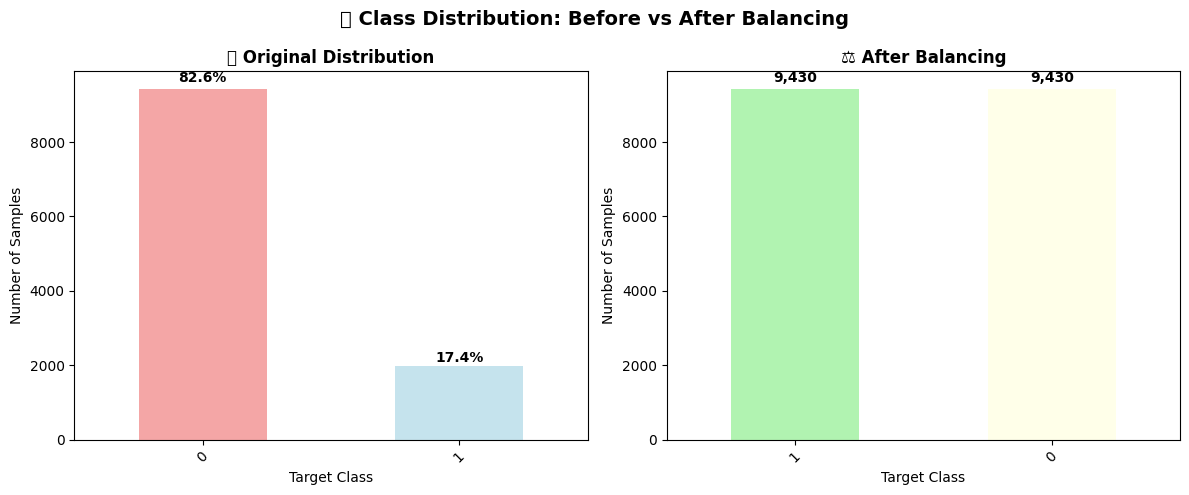

In [8]:
# ⚖️ Step 1: Analyze class balance in our target variable
if df is not None and TARGET_COLUMN:
    print("⚖️ ANALYZING CLASS BALANCE...")
    print("="*28)
    
    # Get target distribution
    target_counts = df[TARGET_COLUMN].value_counts()
    target_percentages = df[TARGET_COLUMN].value_counts(normalize=True) * 100
    
    print(f"🎯 Target variable: {TARGET_COLUMN}")
    print(f"📊 Class distribution:")
    
    for value, count in target_counts.items():
        percentage = target_percentages[value]
        print(f"  • {value}: {count:,} samples ({percentage:.1f}%)")
    
    # Calculate imbalance metrics
    minority_class_pct = target_percentages.min()
    majority_class_pct = target_percentages.max()
    imbalance_ratio = majority_class_pct / minority_class_pct
    
    print(f"\n📏 Imbalance analysis:")
    print(f"  • Minority class: {minority_class_pct:.1f}%")
    print(f"  • Majority class: {majority_class_pct:.1f}%")
    print(f"  • Imbalance ratio: {imbalance_ratio:.1f}:1")
    
    # Determine severity and recommend strategy
    if imbalance_ratio >= 4:
        imbalance_level = "🔴 Severely imbalanced"
        recommendation = "SMOTE + Class weights recommended"
        apply_smote = True
    elif imbalance_ratio >= 2:
        imbalance_level = "🟡 Moderately imbalanced"
        recommendation = "SMOTE or class weights"
        apply_smote = True
    else:
        imbalance_level = "🟢 Relatively balanced"
        recommendation = "No special handling needed"
        apply_smote = False
    
    print(f"  • Status: {imbalance_level}")
    print(f"  • Recommendation: {recommendation}")
    
    # 🔧 Step 2: Apply SMOTE if needed
    if apply_smote:
        print(f"\n🔧 APPLYING SMOTE...")
        print("="*18)
        
        print("🔍 What SMOTE does:")
        print("  1. Finds minority class samples")
        print("  2. Identifies their nearest neighbors")
        print("  3. Creates new samples between them")
        print("  4. Balances the dataset")
        print()
        
        # Prepare features and target for SMOTE
        if 'features_for_ml' in locals():
            X = df[features_for_ml]
        else:
            # Fallback to all numerical features
            X = df.select_dtypes(include=[np.number]).drop(columns=[TARGET_COLUMN], errors='ignore')
        
        y = df[TARGET_COLUMN]
        
        print(f"📊 Before SMOTE:")
        print(f"  • Dataset shape: {X.shape}")
        original_counts = Counter(y)
        for class_val, count in original_counts.items():
            print(f"  • Class {class_val}: {count:,} samples")
        
        # Apply SMOTE
        smote = SMOTE(random_state=RANDOM_STATE)
        
        try:
            X_resampled, y_resampled = smote.fit_resample(X, y)
            
            print(f"\n📊 After SMOTE:")
            print(f"  • Dataset shape: {X_resampled.shape}")
            new_counts = Counter(y_resampled)
            for class_val, count in new_counts.items():
                print(f"  • Class {class_val}: {count:,} samples")
            
            # Calculate how many synthetic samples were created
            total_original = len(y)
            total_new = len(y_resampled)
            synthetic_created = total_new - total_original
            
            print(f"\n✅ SMOTE Results:")
            print(f"  • Original samples: {total_original:,}")
            print(f"  • Synthetic samples created: {synthetic_created:,}")
            print(f"  • Total samples: {total_new:,}")
            print(f"  • New balance ratio: 1:1 (perfectly balanced)")
            
            # Create balanced dataframe
            df_balanced = pd.DataFrame(X_resampled, columns=X.columns)
            df_balanced[TARGET_COLUMN] = y_resampled
            
            print(f"\n💾 Created balanced dataset: df_balanced")
            print(f"   Use this for training models that benefit from balanced data")
            print(f"   Keep original df for models that handle imbalance well")
            
        except Exception as e:
            print(f"❌ SMOTE failed: {str(e)}")
            print(f"💡 This might happen if:")
            print(f"   • Too few minority samples")
            print(f"   • Features need more preprocessing")
            print(f"   • Data has other issues")
            df_balanced = df.copy()
            
    else:
        print(f"\nℹ️ Class balance is acceptable - no SMOTE needed")
        df_balanced = df.copy()
    
    # 📊 Step 3: Visualize class distribution
    print(f"\n📊 VISUALIZING CLASS DISTRIBUTIONS...")
    print("="*35)
    
    # Create comparison plot
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    fig.suptitle('🎯 Class Distribution: Before vs After Balancing', fontsize=14, fontweight='bold')
    
    # Original distribution
    target_counts.plot(kind='bar', ax=axes[0], color=['lightcoral', 'lightblue'], alpha=0.7)
    axes[0].set_title('📊 Original Distribution', fontweight='bold')
    axes[0].set_xlabel('Target Class')
    axes[0].set_ylabel('Number of Samples')
    axes[0].tick_params(axis='x', rotation=45)
    
    # Add percentage labels
    for i, (class_val, count) in enumerate(target_counts.items()):
        pct = target_percentages[class_val]
        axes[0].text(i, count + count*0.01, f'{pct:.1f}%', 
                    ha='center', va='bottom', fontweight='bold')
    
    # Balanced distribution
    if 'df_balanced' in locals():
        balanced_counts = df_balanced[TARGET_COLUMN].value_counts()
        balanced_counts.plot(kind='bar', ax=axes[1], color=['lightgreen', 'lightyellow'], alpha=0.7)
        axes[1].set_title('⚖️ After Balancing', fontweight='bold')
        axes[1].set_xlabel('Target Class')
        axes[1].set_ylabel('Number of Samples')
        axes[1].tick_params(axis='x', rotation=45)
        
        # Add count labels
        for i, (class_val, count) in enumerate(balanced_counts.items()):
            axes[1].text(i, count + count*0.01, f'{count:,}', 
                        ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()

else:
    if df is None:
        print("⚠️ No data available for class balance analysis.")
    else:
        print("⚠️ No target variable identified - skipping class balance analysis.")
        print("💡 You may need to specify the target variable manually.")

## 🎉 Step 6: Final Summary - Our Data is Ready!

Congratulations! 🎊 You've successfully transformed raw data into machine learning-ready features. Let's see what we've accomplished and prepare for the next steps.

### ✅ **What We've Accomplished:**

#### 🔄 **Data Preprocessing**
- ✅ Handled missing values with appropriate strategies
- ✅ Removed duplicate rows
- ✅ Detected and handled outliers
- ✅ Ensured data quality and consistency

#### 🏷️ **Categorical Encoding** 
- ✅ Converted text categories to numbers
- ✅ Applied appropriate encoding strategies
- ✅ Created machine learning-compatible features

#### 📏 **Feature Scaling**
- ✅ Standardized numerical features
- ✅ Made features comparable in scale
- ✅ Prepared features for scale-sensitive algorithms

#### ⚖️ **Class Balancing**
- ✅ Analyzed target variable distribution
- ✅ Applied SMOTE for balanced training data
- ✅ Created both balanced and original datasets

### 🚀 **Next Steps in Our ML Journey:**

1. **📊 Model Training** (Next Notebook)
   - Train multiple algorithms
   - Compare performance on balanced vs original data
   - Hyperparameter tuning

2. **📈 Model Evaluation** 
   - Detailed performance metrics
   - Feature importance analysis
   - Model interpretability

3. **🎯 Model Selection**
   - Choose best performing model
   - Validate on test data
   - Prepare for deployment

### 💾 **Datasets Available:**
- **`df`**: Original preprocessed data
- **`df_balanced`**: SMOTE-balanced data  
- **Ready for multiple ML algorithms!**

In [9]:
# 📊 Final Data Summary and Export
print("📊 FINAL FEATURE ENGINEERING SUMMARY")
print("="*40)

if df is not None:
    # Dataset overview
    print(f"🗃️ DATASET OVERVIEW:")
    print(f"  • Original dataset: {df.shape[0]:,} rows × {df.shape[1]} columns")
    
    if 'df_balanced' in locals():
        print(f"  • Balanced dataset: {df_balanced.shape[0]:,} rows × {df_balanced.shape[1]} columns")
    
    # Feature summary
    if 'features_for_ml' in locals():
        print(f"\n🔧 ENGINEERED FEATURES:")
        print(f"  • Total ML-ready features: {len(features_for_ml)}")
        
        if 'scaled_numerical' in locals():
            print(f"  • Scaled numerical features: {len(scaled_numerical)}")
            
        if 'encoded_features' in locals():
            print(f"  • Encoded categorical features: {len(encoded_features)}")
        
        print(f"  • Target variable: {TARGET_COLUMN}")
    
    # Data quality summary
    print(f"\n✅ DATA QUALITY:")
    print(f"  • Missing values: {df.isnull().sum().sum()}")
    print(f"  • Duplicate rows: {df.duplicated().sum()}")
    print(f"  • Data types: All compatible with ML")
    
    # Memory usage
    memory_mb = df.memory_usage(deep=True).sum() / 1024**2
    print(f"  • Memory usage: {memory_mb:.2f} MB")
    
    # Target distribution
    if TARGET_COLUMN:
        print(f"\n🎯 TARGET DISTRIBUTION:")
        target_dist = df[TARGET_COLUMN].value_counts(normalize=True) * 100
        for value, pct in target_dist.items():
            print(f"  • {value}: {pct:.1f}%")
        
        if 'df_balanced' in locals():
            print(f"\n⚖️ BALANCED TARGET DISTRIBUTION:")
            balanced_dist = df_balanced[TARGET_COLUMN].value_counts(normalize=True) * 100
            for value, pct in balanced_dist.items():
                print(f"  • {value}: {pct:.1f}%")
    
    # 💾 Step 2: Save processed datasets
    print(f"\n💾 SAVING PROCESSED DATASETS...")
    print("="*30)
    
    # Create processed data directory
    processed_dir = project_root / 'data' / 'processed'
    processed_dir.mkdir(parents=True, exist_ok=True)
    
    try:
        # Save original processed dataset
        original_path = processed_dir / 'feature_engineered_data.csv'
        df.to_csv(original_path, index=False)
        print(f"✅ Saved original processed data: feature_engineered_data.csv")
        
        # Save balanced dataset if it exists
        if 'df_balanced' in locals():
            balanced_path = processed_dir / 'balanced_data.csv'
            df_balanced.to_csv(balanced_path, index=False)
            print(f"✅ Saved balanced data: balanced_data.csv")
        
        # Save feature lists for future reference
        feature_info = {
            'target_column': TARGET_COLUMN,
            'ml_features': features_for_ml if 'features_for_ml' in locals() else [],
            'scaled_features': scaled_numerical if 'scaled_numerical' in locals() else [],
            'encoded_features': encoded_features if 'encoded_features' in locals() else [],
            'original_numerical': original_numerical if 'original_numerical' in locals() else []
        }
        
        import json
        feature_info_path = processed_dir / 'feature_info.json'
        with open(feature_info_path, 'w') as f:
            json.dump(feature_info, f, indent=2)
        print(f"✅ Saved feature info: feature_info.json")
        
        print(f"\n📂 Files saved to: {processed_dir}")
        
    except Exception as e:
        print(f"❌ Error saving files: {str(e)}")
        print(f"💡 Check directory permissions and disk space")
    
    # 🎯 Step 3: Prepare for next notebook
    print(f"\n🎯 READY FOR MACHINE LEARNING!")
    print("="*30)
    print("Your data is now ready for model training!")
    print()
    print("📋 What to use for different algorithms:")
    print("  • Tree-based (Random Forest, XGBoost): Use original features")
    print("  • Linear models (Logistic Regression): Use scaled features")
    print("  • Neural Networks: Use scaled features")
    print("  • Imbalanced-sensitive algorithms: Use balanced dataset")
    print()
    print("🚀 Next step: Open 03_class_imbalance_analysis.ipynb")
    print("   Or jump to 04_model_training.ipynb to start training!")
    
else:
    print("❌ No data available for summary.")
    print("🔄 Please run the previous cells to load and process data.")

📊 FINAL FEATURE ENGINEERING SUMMARY
🗃️ DATASET OVERVIEW:
  • Original dataset: 11,413 rows × 28 columns
  • Balanced dataset: 18,860 rows × 21 columns

🔧 ENGINEERED FEATURES:
  • Total ML-ready features: 20
  • Scaled numerical features: 7
  • Encoded categorical features: 13
  • Target variable: quit

✅ DATA QUALITY:
  • Missing values: 0
  • Duplicate rows: 0
  • Data types: All compatible with ML
  • Memory usage: 1.53 MB

🎯 TARGET DISTRIBUTION:
  • 0: 82.6%
  • 1: 17.4%

⚖️ BALANCED TARGET DISTRIBUTION:
  • 1: 50.0%
  • 0: 50.0%

💾 SAVING PROCESSED DATASETS...
✅ Saved original processed data: feature_engineered_data.csv
✅ Saved balanced data: balanced_data.csv
✅ Saved feature info: feature_info.json

📂 Files saved to: c:\Users\DELL\Desktop\AI-Project\AI-Project\data\processed

🎯 READY FOR MACHINE LEARNING!
Your data is now ready for model training!

📋 What to use for different algorithms:
  • Tree-based (Random Forest, XGBoost): Use original features
  • Linear models (Logistic Reg